In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisai
from sklearn import preprocessing

from sklearn.impute import KNNImputer #imputasi
from imblearn.under_sampling import RandomUnderSampler #undersampling
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [56]:
df = pd.read_csv('/content/diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [58]:
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


In [59]:
# function utk count outlier using IQR
def count_outlier_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return ((data < lower_bound) | (data > upper_bound)).sum()

# count outliers in each numerical column
outliers_counts = {}
for col in df.select_dtypes(include=['int64', 'float64']).columns:
  outliers_counts[col] = count_outlier_iqr(df[col])

# convert the result into a dataframe for easier viewing
outliers_counts_df = pd.DataFrame(list(outliers_counts.items()), columns=['Column', 'Outlier Count'])

# display the outlier counts dataframe
outliers_counts_df

,Column,Outlier Count
0,Pregnancies,4
1,Glucose,4
2,BloodPressure,39
3,SkinThickness,1
4,Insulin,26
5,BMI,14
6,DiabetesPedigreeFunction,23
7,Age,16
8,Outcome,0


In [60]:
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


Lakukan preprocessing dan visualisasi pada data diabetes dengan ketentuan :
# 1. Imputasi missing value dengan mean, median, dan modus


In [61]:
df.fillna(df.median(), inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,116.0,72.0,35.0,0.0,32.15,0.627,29.0,1
1,1.0,85.0,66.0,29.0,0.0,32.15,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.30,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.10,0.167,21.0,0
4,0.0,116.0,40.0,35.0,168.0,43.10,0.365,33.0,1


In [62]:
df.fillna(df.mean(), inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,116.0,72.0,35.0,0.0,32.15,0.627,29.0,1
1,1.0,85.0,66.0,29.0,0.0,32.15,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.30,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.10,0.167,21.0,0
4,0.0,116.0,40.0,35.0,168.0,43.10,0.365,33.0,1


In [63]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [64]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,116.0,72.0,35.0,0.0,32.15,0.627,29.0,1
1,1.0,85.0,66.0,29.0,0.0,32.15,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.30,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.10,0.167,21.0,0
4,0.0,116.0,40.0,35.0,168.0,43.10,0.365,33.0,1


# 2. Cek korelasi antar variabel dengan heatmap



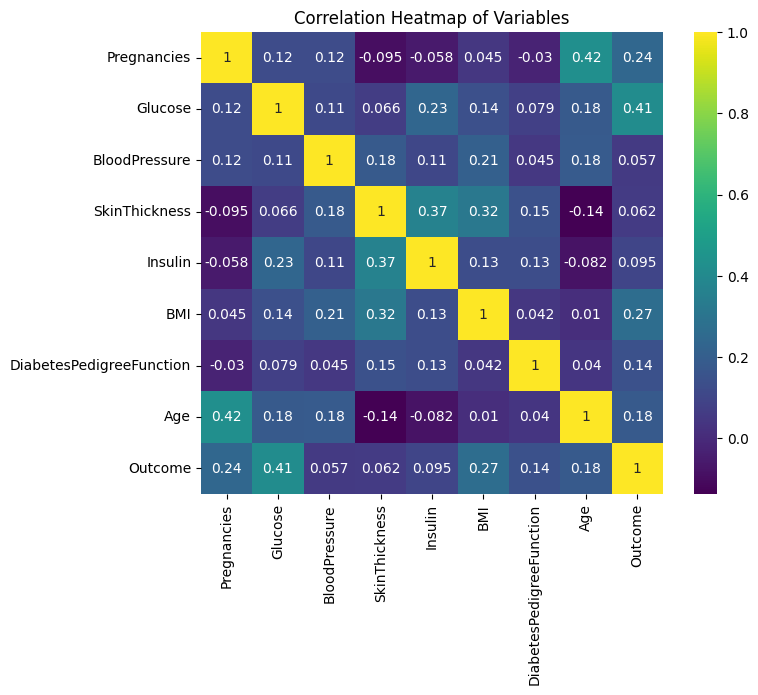

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', square=True, cbar_kws={"shrink":1})
plt.title("Correlation Heatmap of Variables")
plt.show()

# 3. Lakukan imbalance handling dengan undersampling

In [66]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [67]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
rus = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [70]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

<Axes: xlabel='count', ylabel='Outcome'>

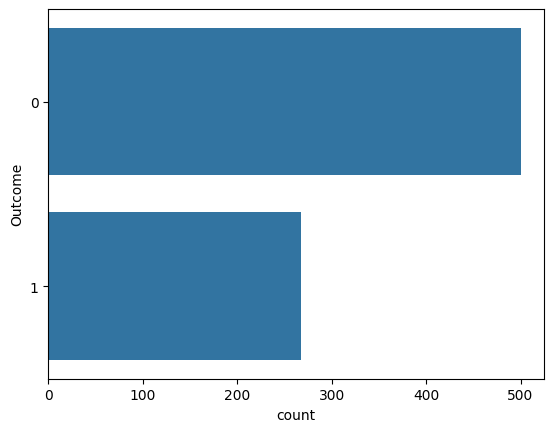

In [71]:
sns.countplot(data=df, y=y)

<Axes: xlabel='count', ylabel='Outcome'>

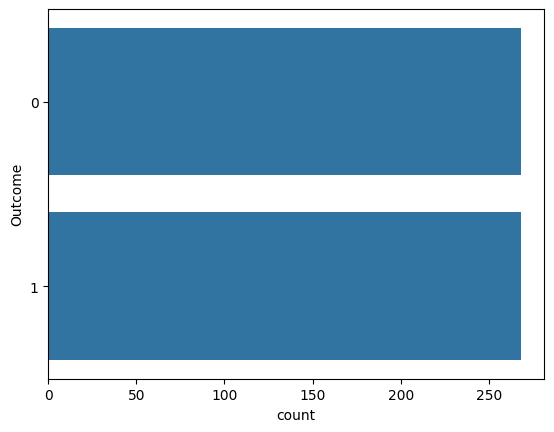

In [72]:
sns.countplot(data=X_resampled, y=y_resampled)

In [73]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,116.0,72.0,35.0,0.0,32.15,0.627,29.0,1
1,1.0,85.0,66.0,29.0,0.0,32.15,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.30,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.10,0.167,21.0,0
4,0.0,116.0,40.0,35.0,168.0,43.10,0.365,33.0,1


# 4. Lakukan scaling dengan robust scaler dan minmax

robust scaler

In [74]:
x = df.drop(columns=['Outcome'])

In [75]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(X)

In [76]:
robust_df = pd.DataFrame(robust_df, columns=X.columns)

In [77]:
robust_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.75,0.000000,0.000000,0.37500,-0.389189,0.000000,0.781506,0.000000
1,-0.50,-0.961240,-0.461538,0.18750,-0.389189,0.000000,-0.041760,0.166667
2,1.25,2.077519,-0.615385,-0.71875,-0.389189,-1.913514,0.915735,0.250000
3,-0.50,-0.837209,-0.461538,0.00000,0.627027,-0.875676,-0.590604,-0.666667
4,-0.75,0.000000,-2.461538,0.37500,1.427027,2.367568,0.000000,0.333333


minmaxscaler

In [78]:
X = df.drop(columns=['Outcome'])

In [79]:
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(X)

In [80]:
minmax_df = pd.DataFrame(minmax_df, columns=X.columns)

In [81]:
minmax_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.582915,0.631579,0.353535,0.000000,0.479136,0.243892,0.133333
1,0.058824,0.427136,0.578947,0.292929,0.000000,0.479136,0.121279,0.166667
2,0.470588,0.919598,0.561404,0.000000,0.000000,0.347243,0.263883,0.183333
3,0.058824,0.447236,0.578947,0.232323,0.138235,0.418778,0.039538,0.000000
4,0.000000,0.582915,0.350877,0.353535,0.247059,0.642325,0.127499,0.200000
